In [ ]:
!pip install tensorflow --upgrade
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load FER2013 dataset
data = pd.read_csv('/content/fer2013.csv')

# Preprocess data
# Preprocess data with error handling
def preprocess_data(data):
    images = []
    emotions = []

    for index, row in data.iterrows():
        emotion = row['emotion']
        img = np.fromstring(row['pixels'], sep=' ')  # Convert pixel values to numpy array

        # Only process the image if it has the correct number of pixels
        if len(img) == 48 * 48:
            img = img.reshape((48, 48))  # FER2013 images are 48x48 pixels
            img = img / 255.0  # Normalize the image

            images.append(img)
            emotions.append(emotion)
        else:
            print(f"Skipping row {index} due to incorrect pixel count.")

    X = np.array(images)
    y = to_categorical(np.array(emotions), num_classes=7)  # 7 emotion classes in FER2013

    # Reshape for CNN input
    X = X.reshape(X.shape[0], 48, 48, 1)
    return X, y

X, y = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_emotion_model():
    model = Sequential()

    # First Conv Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second Conv Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third Conv Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten and Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(7, activation='softmax'))  # 7 output classes

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

emotion_model = build_emotion_model()
emotion_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 619,015 (2.36 MB)

 Trainable params: 619,015 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = emotion_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 146s 315ms/step - accuracy: 0.2482 - loss: 1.8252 - val_accuracy: 0.3459 - val_loss: 1.6432
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 127s 283ms/step - accuracy: 0.3698 - loss: 1.6117 - val_accuracy: 0.4451 - val_loss: 1.4385
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 153s 308ms/step - accuracy: 0.4327 - loss: 1.4601 - val_accuracy: 0.4862 - val_loss: 1.3431
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 131s 292ms/step - accuracy: 0.4736 - loss: 1.3721 - val_accuracy: 0.5198 - val_loss: 1.2760
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 125s 279ms/step - accuracy: 0.4995 - loss: 1.3104 - val_accuracy: 0.5199 - val_loss: 1.2477
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 146s 287ms/step - accuracy: 0.5186 - loss: 1.2664 - val_accuracy: 0.5451 - val_loss: 1.2247
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 123s 273ms/step - accuracy: 0.5280 - loss: 1.2364 - val_accuracy: 0.5492 - val_loss: 1.1821
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 150s 290ms/step - accuracy: 0.5446 -

In [ ]:
# Save the model
emotion_model.save("emotion_model.h5")

# Download the model
from google.colab import files
files.download("emotion_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


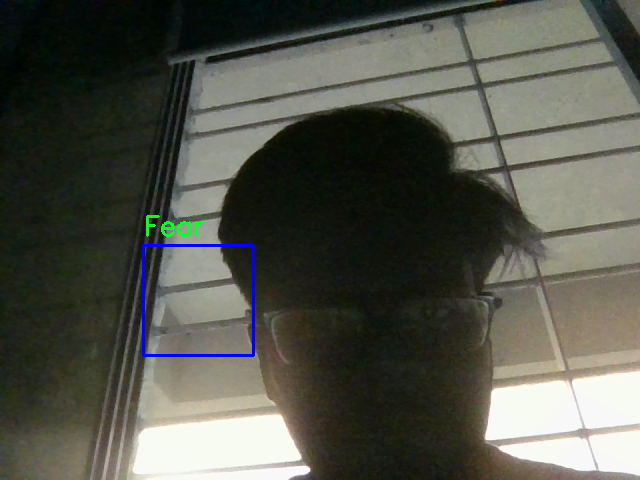

Press Enter to capture another frame or type 'q' to quit: 


<IPython.core.display.Javascript object>

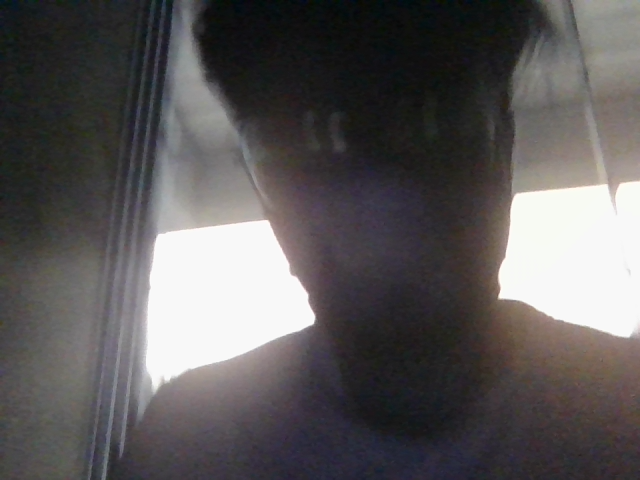

Press Enter to capture another frame or type 'q' to quit: q
Emotion Detection Ended


In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf
from collections import Counter
import io
import time
import base64  # Added this line

# Load the emotion model
emotion_model = tf.keras.models.load_model('/content/emotion_model.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Function to capture an image from the webcam
def capture_image():
    js = """
    async function capture() {
        const video = document.createElement('video');
        const canvas = document.createElement('canvas');
        canvas.width = 640;
        canvas.height = 480;
        document.body.appendChild(video);

        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        const ctx = canvas.getContext('2d');
        ctx.drawImage(video, 0, 0, canvas.width, canvas.height);
        stream.getTracks().forEach(track => track.stop());

        const data = canvas.toDataURL('image/png');
        canvas.remove();
        video.remove();
        return data;
    }
    capture();
    """
    display(Javascript(js))
    data = eval_js("capture()")
    return data

# Function to preprocess face image for prediction
def preprocess_face(face):
    face = cv2.resize(face, (48, 48))
    face = face / 255.0
    face = face.reshape(1, 48, 48, 1)
    return face

# Function to calculate depression score based on emotions (you can adjust weights)
def calculate_depression_score(emotion_counts):
    sad_weight = 1.0
    neutral_weight = 0.5
    happy_weight = -0.5

    sad_count = emotion_counts.get("Sad", 0)
    neutral_count = emotion_counts.get("Neutral", 0)
    happy_count = emotion_counts.get("Happy", 0)

    depression_score = (sad_count * sad_weight + neutral_count * neutral_weight + happy_count * happy_weight) / max(sum(emotion_counts.values()), 1)
    return min(max(depression_score * 10, 0), 10)  # Scale between 0 to 10

# Initialize emotion counter
emotion_counts = Counter()
start_time = time.time()

try:
    while True:
        # Capture image from webcam
        img_data = capture_image()

        # Decode image
        img_bytes = io.BytesIO(base64.b64decode(img_data.split(',')[1]))
        img = Image.open(img_bytes).convert('RGB')
        img = np.array(img)

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        # Process each detected face
        for (x, y, w, h) in faces:
            face = gray[y:y+h, x:x+w]
            preprocessed_face = preprocess_face(face)
            prediction = emotion_model.predict(preprocessed_face)
            emotion = emotion_labels[np.argmax(prediction)]

            emotion_counts[emotion] += 1  # Update emotion count

            # Draw bounding box and label on image
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.putText(img, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

        # Display the image with detections
        display_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        display(display_img)

        # Calculate depression score every 30 seconds
        if time.time() - start_time > 30:
            depression_score = calculate_depression_score(emotion_counts)
            print(f"Depression Score: {depression_score:.2f} / 10")
            emotion_counts.clear()
            start_time = time.time()

        # Ask user to continue or break (emulating a "real-time" loop in Colab)
        cont = input("Press Enter to capture another frame or type 'q' to quit: ")
        if cont.lower() == 'q':
            break

finally:
    print("Emotion Detection Ended")




In [4]:
def calculate_depression_score(emotion_counts, duration_seconds=60):
    sad_count = emotion_counts.get('Sad', 0)
    neutral_count = emotion_counts.get('Neutral', 0)
    happy_count = emotion_counts.get('Happy', 0)

    depression_score = 5

    if sad_count > happy_count:
        depression_score += (sad_count - happy_count) / duration_seconds * 10
    elif neutral_count > happy_count:
        depression_score += (neutral_count - happy_count) / duration_seconds * 5

    return min(10, max(1, int(depression_score)))
